### Widgets and Interactions 

In [1]:
!conda install -y netcdf4

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Reasearch\Anaconda3:
#
netcdf4                   1.2.4               np111py35_0  


In [2]:
from netCDF4 import Dataset, num2date, date2num
from numpy import * 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets 

In [4]:
x = linspace(0, 1, 100) # generates a hundred values between 0 and 1
f = 2
a = 3

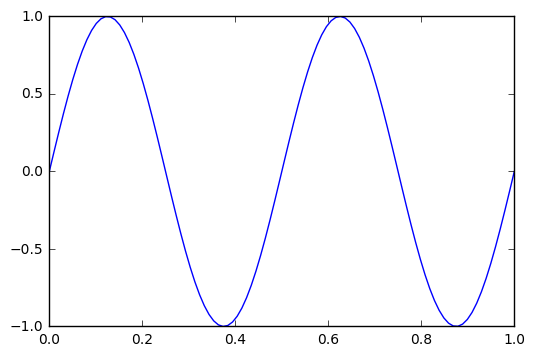

In [5]:
plt.plot(x, sin(2*pi*x*f))

In [6]:
def pltsin(f):
    plt.plot(x, sin(2*pi*x*f))

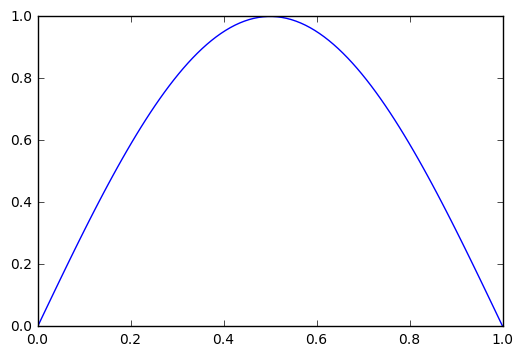

In [7]:
pltsin(0.5)

### Add to the function to allow amplitude to be varied and aadd in an additional slider to vary both f and a
 - may want to limit ylim 

<function __main__.pltsin>

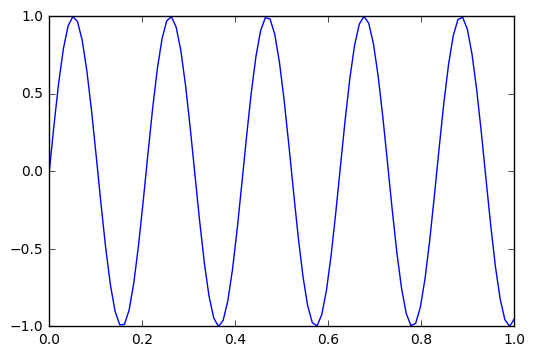

In [8]:
interact(pltsin, f=(1, 10, 0.2), x = (1, 10, 0.2))

In [9]:
def pltsina(f, a):
    plt.plot(x, a*sin(2*pi*x*f))
    plt.ylim(-10.5, 10.5)

<function __main__.pltsina>

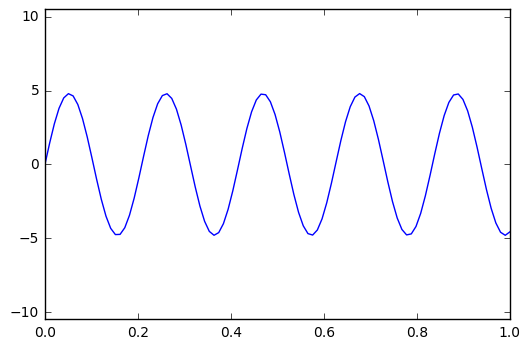

In [10]:
interact(pltsina, f=(1, 10, 0.2), a = (1, 10, 0.2))


### Climate data 

In [11]:
f=Dataset ('ncep-data/air.sig995.2013.nc') # get individual data set out of the right folder 

In [12]:
air = f.variables['air'] # get variable

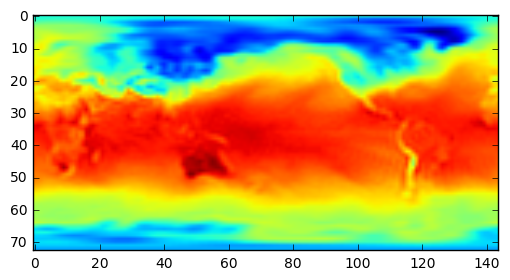

In [13]:
plt.imshow(air[0,:,:]) # display first timestep

In [14]:
# Create function to browse through the days 

def sh(time):
    plt.imshow(air[time,:,:])

<function __main__.sh>

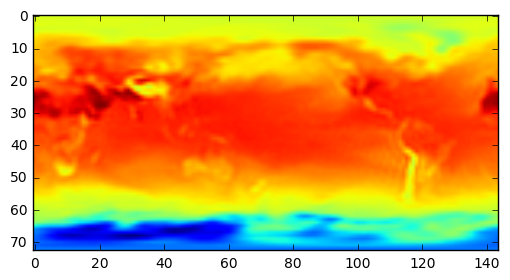

In [15]:
# Now make it interactive

interact(sh, time=(0, 355, 1))

In [16]:
# Browse variable 

def sh(time =0, var='air',  year = '2013'):
    f=Dataset('ncep-data/'+var+'.sig995.'+year+'.nc')
    vv=f.variables[var]
    plt.imshow(vv[time,:,:])

In [17]:
#Give a list of variables 

variabs =['air', 'uwnd', 'vwnd', 'rhum']
year = ['2013', '2014', '2015']

<function __main__.sh>

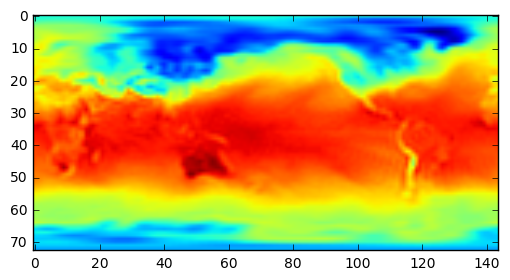

In [18]:
# Now interact with it 

interact(sh, time=(0, 355, 1), year = year, var=variabs)

In [19]:
help(sh)

Help on function sh in module __main__:

sh(time=0, var='air', year='2013')



In [20]:
from mpl_toolkits.basemap import Basemap

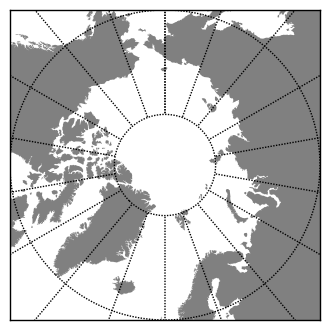

In [21]:
# create north polar sterographic projection 

m=Basemap(projection='npstere', boundinglat=60, lon_0=0, resolution ='l')
m.fillcontinents(color='gray', lake_color='gray')
m.drawparallels(arange(-80.,81.,20.))
m.drawmeridians(arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')

In [22]:
# Set up some variables 
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
lon, lat = meshgrid(lon, lat)
x, y = m(lon, lat)

In [23]:
def sh(time =0, var='air',  year = '2013'):
    f=Dataset('ncep-data/'+var+'.sig995.'+year+'.nc')
    vv=f.variables[var]
    tt=f.variables['time']
    dd=num2date(tt[time], tt.units)
    m.fillcontinents(color='gray', lake_color='gray')
    m.drawparallels(arange(-80.,81.,20.))
    m.drawmeridians(arange(-180.,181.,20.))
    m.drawmapboundary(fill_color='white')
    cs = m.contourf(x, y, vv[time,:,:]-273.15)

<function __main__.sh>

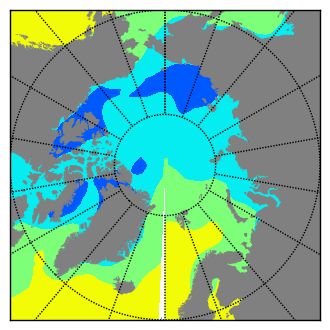

In [24]:
interact(sh, year=year, time=(0,355,1), var=variabs)

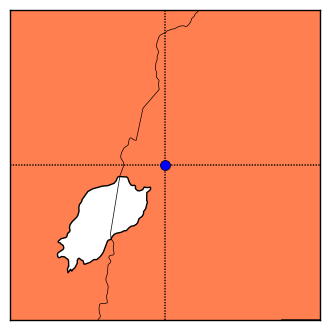

In [32]:
my_map = Basemap (projection='merc', lat_0=0, lon_0=30,
                 resolution='h', area_thresh=1000.0,
                 llcrnrlon=29, llcrnrlat=-1,
                 urcrnrlon=31, urcrnrlat=1)
# area threshold states how rivers etc look - scale, resolution sets resolution, llcrnlon etc sets box, 
# lat and lon decide where you look 
my_map.drawcoastlines()

my_map.drawcountries()
my_map.fillcontinents(color='coral')

my_map.drawmapboundary()

my_map.drawmeridians(arange(0,360,30))
my_map.drawparallels(arange(-90, 90, 30))

lon=30
lat=0

x,y=my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=7.2)
plt.show() # here the function that decides actually plots 

In [26]:
# This just lets the output of the following code samples 
# display inline on this page, at an appropirate size
from pylab import rcParams

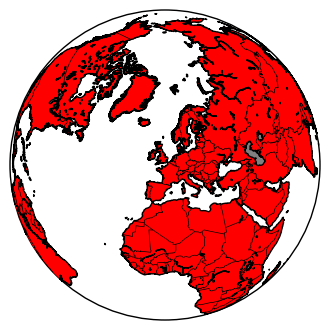

In [30]:
# Create a simple basemap 

my_map = Basemap (projection='ortho', lat_0=50, lon_0=0,
                 resolution='l', area_thresh=1000.0)

my_map.drawcoastlines()

my_map.drawcountries()
my_map.fillcontinents(color='red', lake_color='gray')


plt.show()

#### Plotting some live (ish) earthquake data...
Download the data first: http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv
This will download a file locally- move it into your working directory. Alternatively, use the historic dataset provided in this repo.

In [41]:
#Check the first few lats and longs

import csv

# Open the earthquake data file.
filename = '1.0_week.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons, mags = [], [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        mags.append(float(row[4]))
        
# Display the first 5 lats and lons.
print('lats', lats[0:5])
print('lons', lons[0:5])
print('mags', mags[0:5])

lats [58.8194, 38.3672, 38.8388329, 32.8655, 61.2948]
lons [-153.8621, -118.9048, -122.8259964, -116.1966667, -149.1667]
mags [1.9, 1.5, 1.34, 1.1, 1.0]


In [87]:
### And now create a plot of these on a map projection

import csv

# Open the earthquake data file.
filename = '1.0_week.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons, mags = [], [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        mags.append(float(row[4]))
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=52, lon_0=0)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'coral')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 1
for lon, lat, mags in zip(lons, lats, mags):
    x,y = eq_map(lon, lat) 
    msize = mags * min_marker_size  
    eq_map.plot(x, y, , markersize=msize)
    if mags >= 5.0 
        eqcolor = 'r'
    elif: mags >= 1.0 and <= 3.0  
        eqcolor = 'g'
    elif: <= 1.0
        eqcolor = 'y
    eq_map.plot(x, y, eqcolor, markersize=msize)
    
plt.show()



SyntaxError: invalid syntax (<ipython-input-87-3f019e994e8c>, line 44)

### This is great but one cool enhancement would be to make the size of the point represent the magnitude of the earthquake.
Here's one way to do it:
Read the magnitudes into a list along with their respective lat and long
Loop through the list, plotting one point at a time
As the magnitudes start at 1.0, you can just use the magnitude directly as the scale factor
To get the marker size, multiply the magnitude by the smallest dot you want on the map.
Add an extra enhancement of colour:
make small earthquakes
See if you can get similar data, perhaps for Whale sightings, and plot those on a map.
You might even have some of your own data to plot..

In [65]:
x,y

([21.78716871465381,
  21.7847580465964,
  21.784750694759317,
  21.78397550163768,
  21.787640150824092,
  21.78409577655604,
  21.784189674849756,
  21.78301607575062,
  21.78863923276745,
  21.78736854563921,
  21.784140661219155,
  21.787602404573175,
  21.787610130942554,
  21.78767490411616,
  21.781135495856315,
  21.781141538946798,
  1e+30,
  21.7860110915959,
  21.78271327379831,
  21.784741312255168,
  21.784432224895177,
  21.787883805614776,
  21.784556014670365,
  21.78787539287508,
  21.784746938993027,
  21.783975216256128,
  21.78397535894787,
  21.787864439443776,
  21.787912520414782,
  21.783972880421352,
  21.781118360973835,
  21.78754614698003,
  21.78278306879627,
  21.781118360973835,
  21.78423490563243,
  21.78783861629539,
  21.78712151186026,
  21.784139427105263,
  21.786664360165563,
  21.784745193949387,
  21.785168754598757,
  1e+30,
  21.784556226668382,
  21.787547864743114,
  21.78442627677015,
  21.787406661370333,
  21.787533382370363,
  21.7873090